In [15]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [20]:
series = pd.read_csv('airline-passengers.csv', header=0, index_col=0)
print(series.shape)
series.head()

(144, 1)


,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


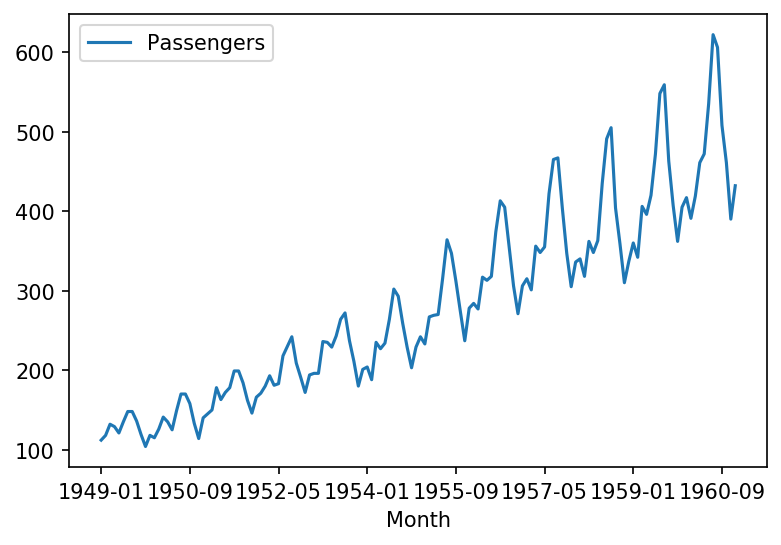

In [16]:
series.plot()

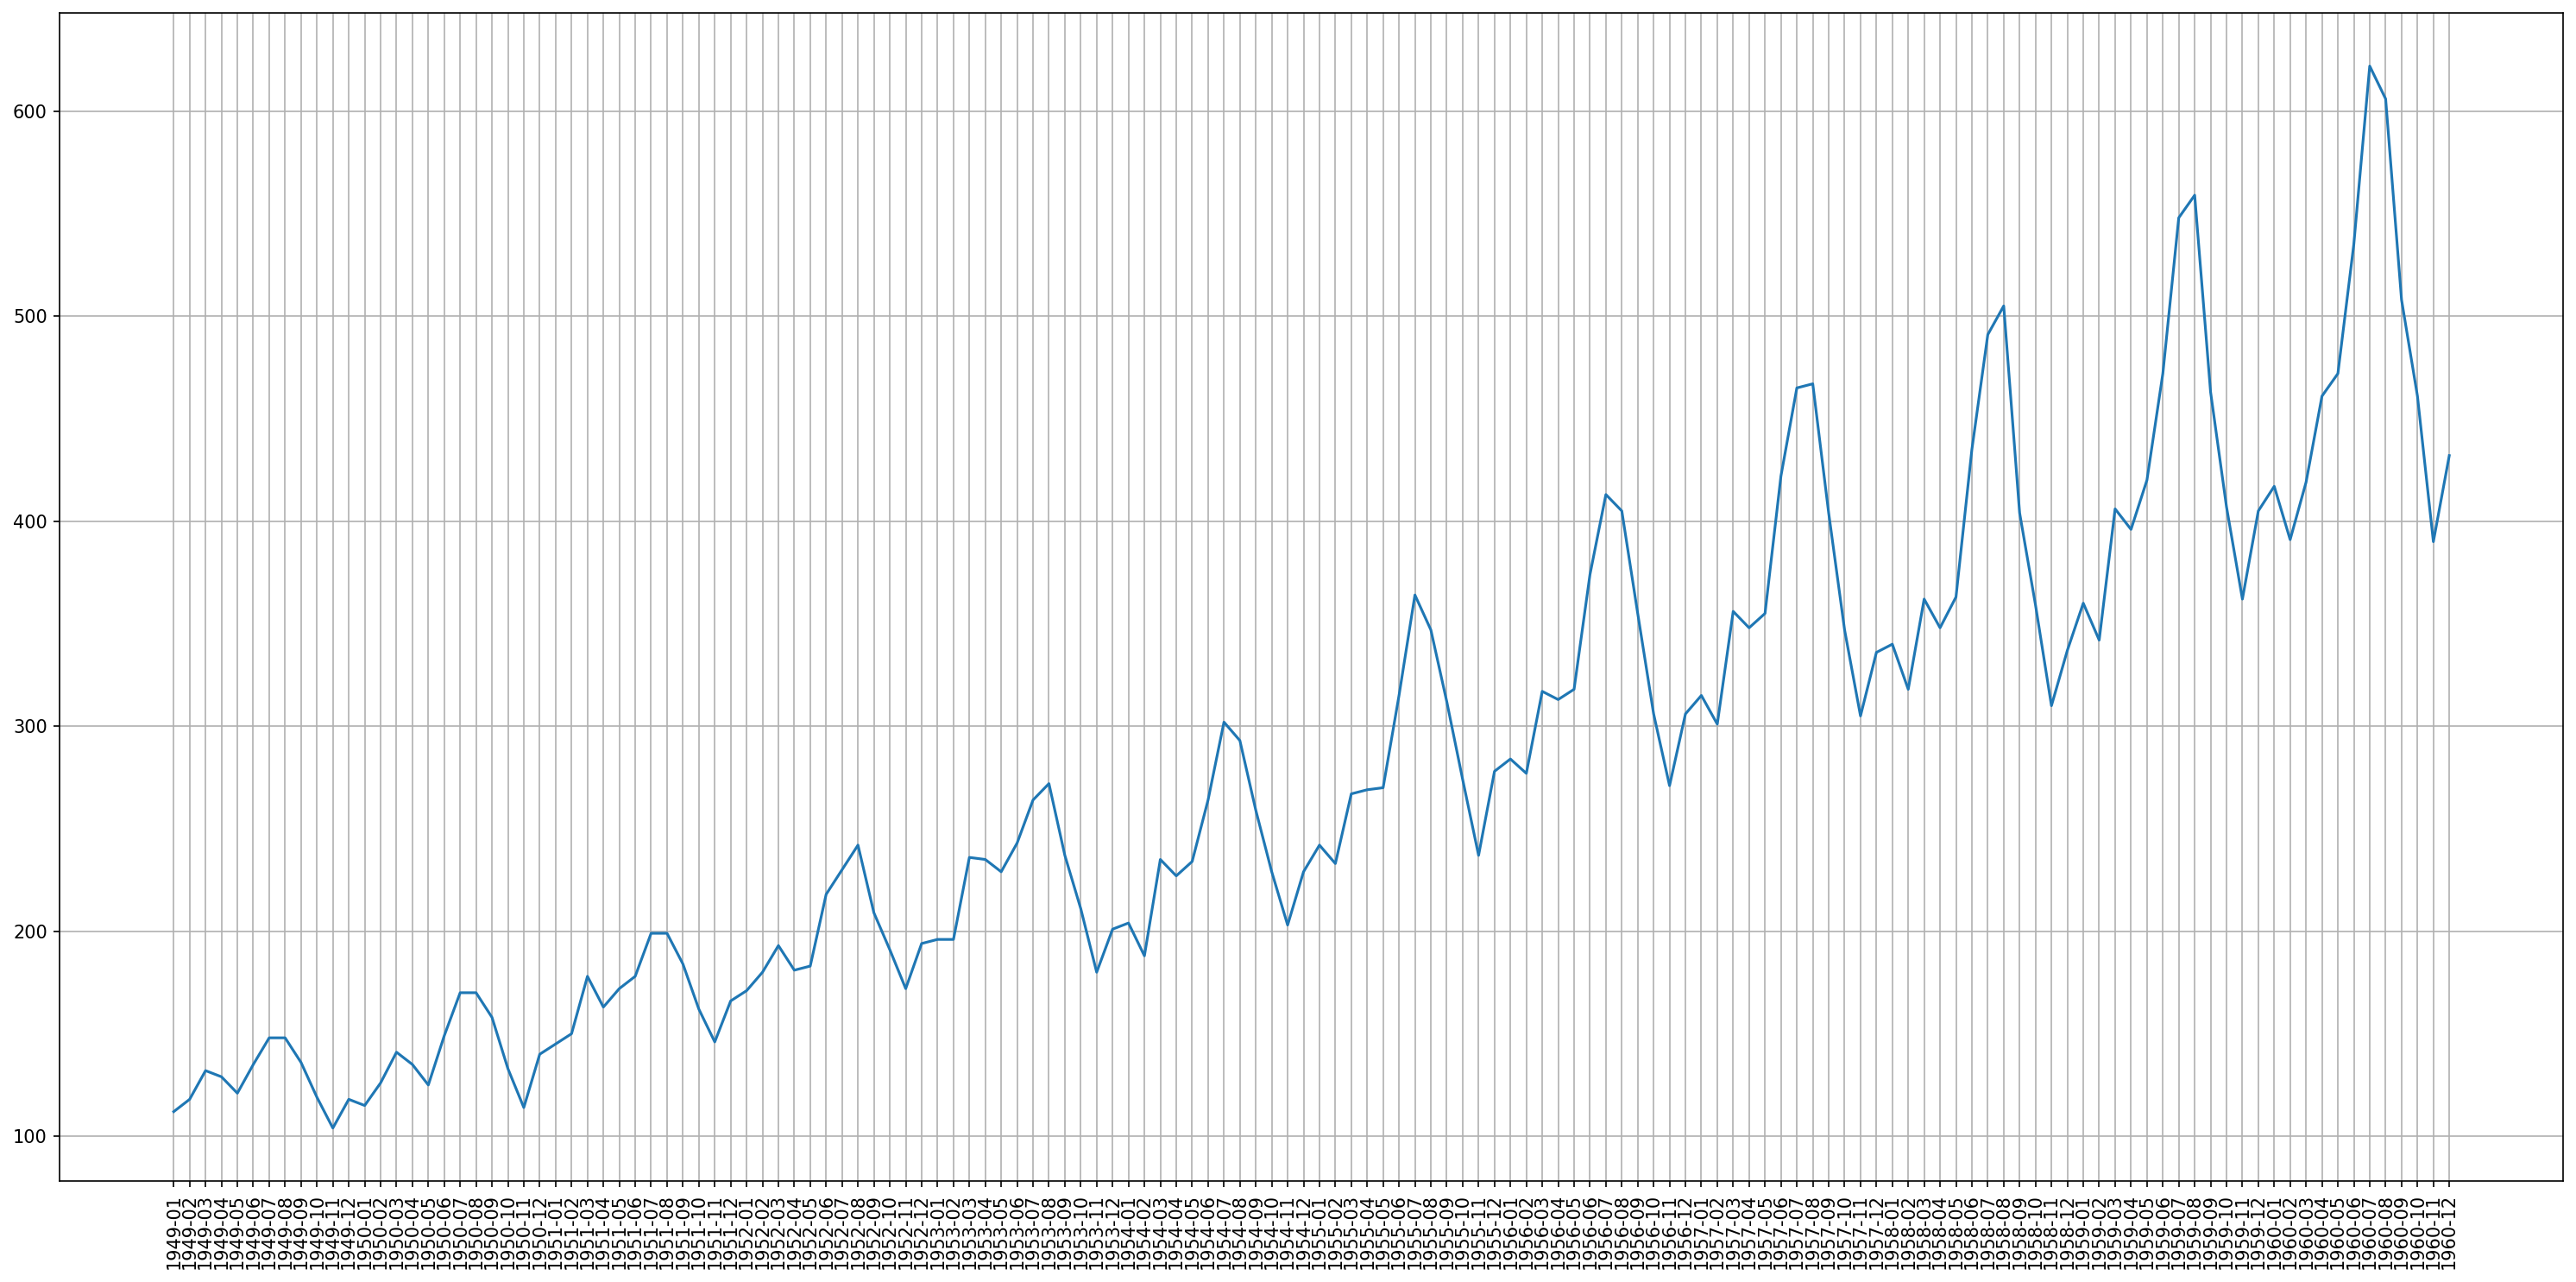

In [37]:
plt.figure(figsize=(20,10))
plt.plot(series)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()

In [38]:
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

In [39]:
# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
    df = DataFrame(data)
    cols = list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    
    # put it all together
    agg = concat(cols, axis=1)
    
    # drop rows with NaN values
    agg.dropna(inplace=True)
    
    return agg.values

In [40]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # fit model
    model = model_fit(train, cfg)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
   
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = model_predict(model, history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        
    # estimate prediction error
    error = measure_rmse(test, predictions)
    print(' > %.3f' % error)
    return error

In [ ]:
# score a model, return None on failure
def repeat_evaluate(data, config, n_test, n_repeats=10):
    # convert config to a key
    key = str(config)
    
    # fit and evaluate the model n times
    scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
    
    # summarize score
    result = mean(scores)
    
    print('> Model[%s] %.3f' % (key, result))
    return (key, result)

In [41]:
# grid search configs
def grid_search(data, cfg_list, n_test):
    # evaluate configs
    scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
    
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    
    return scores

In [42]:
def model_predict(model, history, offset):
    history[-offset]

In [43]:
from math import sqrt
from numpy import mean
from pandas import read_csv
from sklearn.metrics import mean_squared_error

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

# fit a model
def model_fit(train, config):
    return None

# forecast with a pre-fit model
def model_predict(model, history, offset):
    return history[-offset]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    
    # split dataset
    train, test = train_test_split(data, n_test)
    
    # fit model
    model = model_fit(train, cfg)
    
    # seed history with training dataset
    history = [x for x in train]
    
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = model_predict(model, history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
   
    # estimate prediction error
    error = measure_rmse(test, predictions)
    print(' > %.3f' % error)
    return error

# score a model, return None on failure
def repeat_evaluate(data, config, n_test, n_repeats=10):
    # convert config to a key
    key = str(config)
    
    # fit and evaluate the model n times
    scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]

    result = mean(scores)
    print('> Model[%s] %.3f' % (key, result))
    return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test):
    # evaluate configs
    scores = [repeat_evaluate(data, cfg, n_test) for cfg in cfg_list]
    
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores


series = read_csv('airline-passengers.csv', header=0, index_col=0)
data = series.values

n_test = 12 # data split
cfg_list = [1, 6, 12, 24, 36] # model configs

scores = grid_search(data, cfg_list, n_test) # grid search

# list top 10 configs
for cfg, error in scores[:10]:
    print(cfg, error)

 > 53.152
 > 53.152
 > 53.152
 > 53.152
 > 53.152
 > 53.152
 > 53.152
 > 53.152
 > 53.152
 > 53.152
> Model[1] 53.152
 > 126.735
 > 126.735
 > 126.735
 > 126.735
 > 126.735
 > 126.735
 > 126.735
 > 126.735
 > 126.735
 > 126.735
> Model[6] 126.735
 > 50.708
 > 50.708
 > 50.708
 > 50.708
 > 50.708
 > 50.708
 > 50.708
 > 50.708
 > 50.708
 > 50.708
> Model[12] 50.708
 > 97.110
 > 97.110
 > 97.110
 > 97.110
 > 97.110
 > 97.110
 > 97.110
 > 97.110
 > 97.110
 > 97.110
> Model[24] 97.110
 > 110.274
 > 110.274
 > 110.274
 > 110.274
 > 110.274
 > 110.274
 > 110.274
 > 110.274
 > 110.274
 > 110.274
> Model[36] 110.274
12 50.708316214732804
1 53.1515129919491
24 97.10990337413241
36 110.27352356753639
6 126.73495965991387


# --------------------------------------------------------------------

In [46]:
# grid search cnn for airline passengers
from math import sqrt
from numpy import array, mean
from pandas import DataFrame, concat, read_csv
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    agg.dropna(inplace=True)
    return agg.values

# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

# difference dataset
def difference(data, order):
    return [data[i] - data[i - order] for i in range(order, len(data))]

# fit a model
def model_fit(train, config):
    # unpack config
    n_input, n_filters, n_kernel, n_epochs, n_batch, n_diff = config
    # prepare data
    if n_diff > 0:
        train = difference(train, n_diff)
    # transform series into supervised format
    data = series_to_supervised(train, n_in=n_input)
    # separate inputs and outputs
    train_x, train_y = data[:, :-1], data[:, -1]
    # reshape input data into [samples, timesteps, features]
    n_features = 1
    train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], n_features))
    # define model
    model = Sequential()
    model.add(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu', input_shape=(n_input, n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    # fit
    model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
    return model

# forecast with the fit model
def model_predict(model, history, config):
    # unpack config
    n_input, _, _, _, _, n_diff = config
    # prepare data
    correction = 0.0
    if n_diff > 0:
        correction = history[-n_diff]
        history = difference(history, n_diff)
    x_input = array(history[-n_input:]).reshape((1, n_input, 1))
    # forecast
    yhat = model.predict(x_input, verbose=0)
    return correction + yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # fit model
    model = model_fit(train, cfg)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = model_predict(model, history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    print(' > %.3f' % error)
    return error

# score a model, return None on failure
def repeat_evaluate(data, config, n_test, n_repeats=10):
    # convert config to a key
    key = str(config)
    # fit and evaluate the model n times
    scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
    # summarize score
    result = mean(scores)
    print('> Model[%s] %.3f' % (key, result))
    return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test):
    # evaluate configs
    scores = [repeat_evaluate(data, cfg, n_test) for cfg in cfg_list]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores

# create a list of configs to try
def model_configs():
    # define scope of configs
    n_input = [12]
    n_filters = [64]
    n_kernels = [3, 5]
    n_epochs = [100]
    n_batch = [1, 150]
    n_diff = [0, 12]
    # create configs
    configs = list()
    for a in n_input:
        for b in n_filters:
            for c in n_kernels:
                for d in n_epochs:
                    for e in n_batch:
                        for f in n_diff:
                            cfg = [a,b,c,d,e,f]
                            configs.append(cfg)
    print('Total configs: %d' % len(configs))
    return configs

# define dataset
series = read_csv('airline-passengers.csv', header=0, index_col=0)
data = series.values
# data split
n_test = 12
# model configs
cfg_list = model_configs()
# grid search
scores = grid_search(data, cfg_list, n_test)
print('done')
# list top 10 configs
for cfg, error in scores[:3]:
    print(cfg, error)

Total configs: 8
 > 19.830
 > 36.538
 > 20.831
 > 14.879
 > 15.430
 > 27.859
 > 18.334
 > 19.638
 > 38.763
 > 17.863
> Model[[12, 64, 3, 100, 1, 0]] 22.996
 > 21.689
 > 22.089
 > 19.215
 > 19.673
 > 19.034
 > 20.625
 > 21.101
 > 22.956
 > 21.040
 > 20.172
> Model[[12, 64, 3, 100, 1, 12]] 20.759
 > 76.625
 > 92.361
 > 74.684
 > 79.868
 > 68.876
 > 67.716
 > 69.328
 > 84.085
 > 83.975
 > 81.078
> Model[[12, 64, 3, 100, 150, 0]] 77.860
 > 20.030
 > 19.528
 > 18.952
 > 19.272
 > 18.609
 > 18.864
 > 18.208
 > 18.807
 > 18.917
 > 19.947
> Model[[12, 64, 3, 100, 150, 12]] 19.113
 > 20.138
 > 19.909
 > 17.370
 > 18.406
 > 22.221
 > 28.303
 > 19.581
 > 22.390
 > 16.829
 > 19.677
> Model[[12, 64, 5, 100, 1, 0]] 20.482
 > 19.413
 > 19.652
 > 17.216
 > 17.231
 > 18.810
 > 20.773
 > 18.362
 > 19.963
 > 18.021
 > 20.275
> Model[[12, 64, 5, 100, 1, 12]] 18.972
 > 76.514
 > 80.932
 > 87.354
 > 86.463
 > 100.270
 > 91.679
 > 80.649
 > 82.810
 > 82.999
 > 80.925
> Model[[12, 64, 5, 100, 150, 0]] 85.059


In [48]:
# grid search lstm for airline passengers
from math import sqrt
from numpy import array, mean
from pandas import DataFrame, concat, read_csv
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    agg.dropna(inplace=True)
    return agg.values

# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

# difference dataset
def difference(data, order):
    return [data[i] - data[i - order] for i in range(order, len(data))]

# fit a model
def model_fit(train, config):
    # unpack config
    n_input, n_nodes, n_epochs, n_batch, n_diff = config
    # prepare data
    if n_diff > 0:
        train = difference(train, n_diff)
    # transform series into supervised format
    data = series_to_supervised(train, n_in=n_input)
    # separate inputs and outputs
    train_x, train_y = data[:, :-1], data[:, -1]
    # reshape input data into [samples, timesteps, features]
    n_features = 1
    train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], n_features))
    # define model
    model = Sequential()
    model.add(LSTM(n_nodes, activation='relu', input_shape=(n_input, n_features)))
    model.add(Dense(n_nodes, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    # fit model
    model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
    return model

# forecast with the fit model
def model_predict(model, history, config):
    # unpack config
    n_input, _, _, _, n_diff = config
    # prepare data
    correction = 0.0
    if n_diff > 0:
        correction = history[-n_diff]
        history = difference(history, n_diff)
    # reshape sample into [samples, timesteps, features]
    x_input = array(history[-n_input:]).reshape((1, n_input, 1))
    # forecast
    yhat = model.predict(x_input, verbose=0)
    return correction + yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # fit model
    model = model_fit(train, cfg)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = model_predict(model, history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    print(' > %.3f' % error)
    return error

# score a model, return None on failure
def repeat_evaluate(data, config, n_test, n_repeats=10):
    # convert config to a key
    key = str(config)
    # fit and evaluate the model n times
    scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
    # summarize score
    result = mean(scores)
    print('> Model[%s] %.3f' % (key, result))
    return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test):
    # evaluate configs
    scores = [repeat_evaluate(data, cfg, n_test) for cfg in cfg_list]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores

# create a list of configs to try
def model_configs():
    # define scope of configs
    n_input = [12]
    n_nodes = [100]
    n_epochs = [50]
    n_batch = [1, 150]
    n_diff = [12]
    # create configs
    configs = list()
    for i in n_input:
        for j in n_nodes:
            for k in n_epochs:
                for l in n_batch:
                    for m in n_diff:
                        cfg = [i, j, k, l, m]
                        configs.append(cfg)
    print('Total configs: %d' % len(configs))
    return configs

# define dataset
series = read_csv('airline-passengers.csv', header=0, index_col=0)
data = series.values
# data split
n_test = 12
# model configs
cfg_list = model_configs()
# grid search
scores = grid_search(data, cfg_list, n_test)
print('done')
# list top 10 configs
for cfg, error in scores[:3]:
    print(cfg, error)

Total configs: 2
 > 19.448
 > 21.463
 > 30.966
 > 18.565
 > 21.897
 > 21.148
 > 26.940
 > 21.268
 > 19.098
 > 26.402
> Model[[12, 100, 50, 1, 12]] 22.720
 > 20.974
 > 22.687
 > 20.242
 > 22.080
 > 20.811
 > 18.977
 > 20.734
 > 17.431
 > 20.327
 > 20.180
> Model[[12, 100, 50, 150, 12]] 20.444
done
[12, 100, 50, 150, 12] 20.444352942885367
[12, 100, 50, 1, 12] 22.719651321111613
